In [6]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [7]:
def draw(base, size):
    verts = [
        (base[1], base[0]), # left, bottom
        (base[1], base[0] + size[0]), # left, top
        (base[1] + size[1], base[0] + size[0]), # right, top
        (base[1] + size[1], base[0]), # right, bottom
        (0., 0.), # ignored
        ]

    codes = [Path.MOVETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.CLOSEPOLY,
             ]
    
    path = Path(verts, codes)
    
    return path

In [8]:
def check(inp, out):    
    k = int(inp[0].strip())
    m = int(inp[1].strip())
    n = int(inp[2].strip())
    rect = [list(map(int, l.strip().split(" "))) for l in inp[3:]]
    rect = {x[0]:x[1:] for x in rect}
    
    places = [list(map(int, l.strip().split(" "))) for l in out]
    
    aire = 0
    for r in rect.values():
        aire += r[0] * r[1]
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    major_ticks = list(range(0, max(m,n), 5))
    minor_ticks = list(range(0, max(m,n), 1))
    
    ax.set_xticks(major_ticks)                                                       
    ax.set_xticks(minor_ticks, minor=True)                                           
    ax.set_yticks(major_ticks)                                                       
    ax.set_yticks(minor_ticks, minor=True)    
    
    ax.grid(which='minor', alpha=0.7)                                                
    ax.grid(which='major', alpha=1)    
    
    if aire < m*n:
        ax.add_patch(patches.PathPatch(draw([0,0],[n,m]), facecolor='lightgrey', lw=2))
    else:
        ax.add_patch(patches.PathPatch(draw([0,0],[n,m]), facecolor='blue', lw=2))
    
    for (id, h, w) in places:
        base_h, base_w = rect[id]
        ax.add_patch(patches.PathPatch(draw([h, w],[base_h, base_w]), facecolor='red', lw=2, alpha=0.4))
        ax.text(w + 0.2, h + 0.2, str(id), fontsize=10)
    
    ax.set_xlim(-1,m + 1)
    ax.set_ylim(-1,n + 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    
    return "Surface des pièces : %i, surface du rectange: %i. Surface possible: %s" % (aire, m*n, "oui" if aire < m*n else "non")

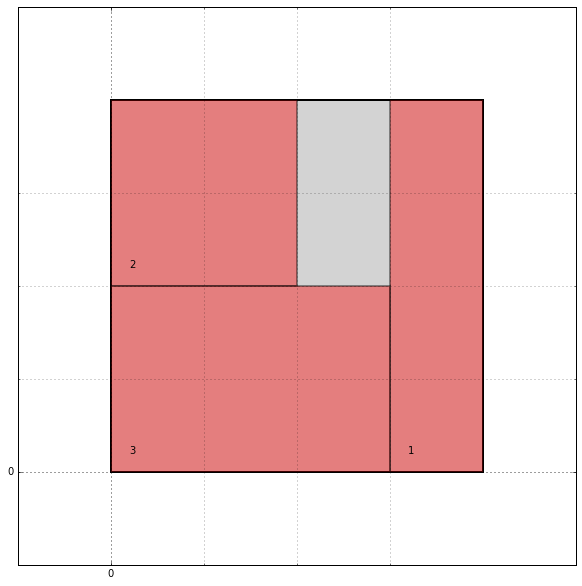

'Surface des pièces : 14, surface du rectange: 16. Surface possible: oui'

In [9]:
inp = """3
4
4       
1 4 1
2 2 2
3 2 3""".split("\n")

out = """1 0 3
2 2 0
3 0 0""".split("\n")

check(inp, out)

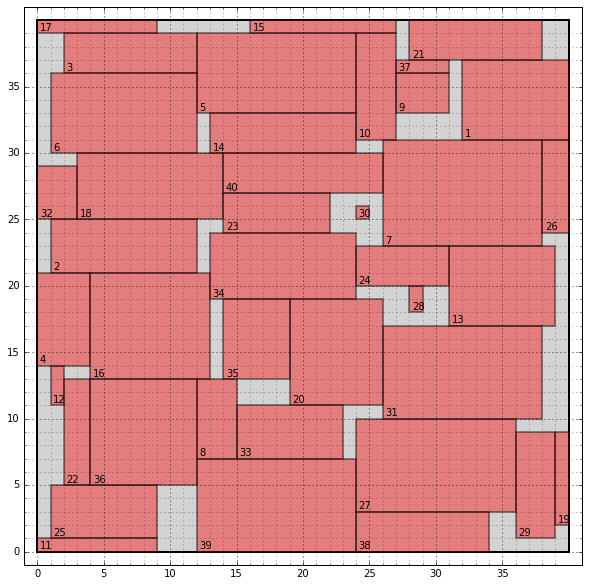

'Surface des pièces : 1420, surface du rectange: 1600. Surface possible: oui'

In [10]:
inp = """ 40
 40
 40
 1 6 8
 2 4 11
 3 3 10
 4 7 4
 5 6 12
 6 6 11
 7 8 12
 8 6 3
 9 3 4
 10 8 3
 11 1 9
 12 3 1
 13 6 8
 14 3 11
 15 1 11
 16 8 9
 17 1 9
 18 5 11
 19 7 1
 20 8 7
 21 3 10
 22 8 2
 23 3 8
 24 3 7
 25 4 8
 26 7 2
 27 7 12
 28 2 1
 29 8 3
 30 1 1
 31 7 12
 32 4 3
 33 4 8
 34 5 11
 35 6 5
 36 8 8
 37 1 4
 38 3 10
 39 7 12
 40 3 12""".split("\n")

out = """1 31 32
2 21 1
3 36 2
4 14 0
5 33 12
6 30 1
7 23 26
8 7 12
9 33 27
10 31 24
11 0 0
12 11 1
13 17 31
14 30 13
15 39 16
16 13 4
17 39 0
18 25 3
19 2 39
20 11 19
21 37 28
22 5 2
23 24 14
24 20 24
25 1 1
26 24 38
27 3 24
28 18 28
29 1 36
30 25 24
31 10 26
32 25 0
33 7 15
34 19 13
35 13 14
36 5 4
37 36 27
38 0 24
39 0 12
40 27 14""".split("\n")

check(inp, out)

In [11]:
def internet(i,o):
    data = requests.get("http://paste.awesom.eu/raw/" + i).text.strip().replace("\r", "").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").split("\n")
    out = requests.get("http://paste.awesom.eu/raw/" + o).text.strip().replace("\r", "").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").split("\n")

    return check(data, out)

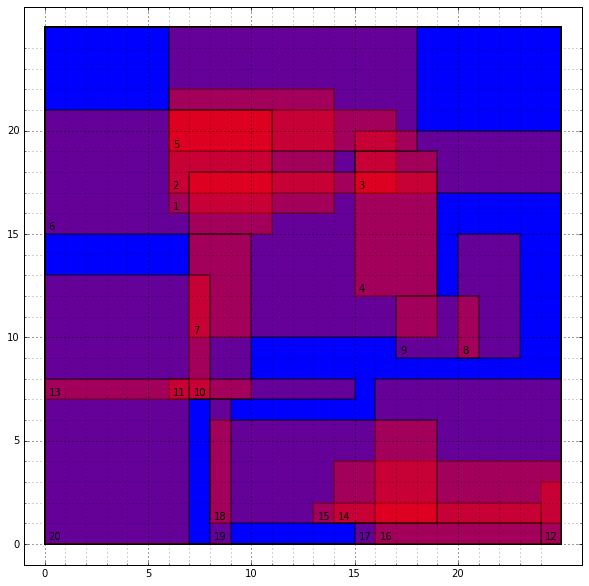

'Surface des pièces : 741, surface du rectange: 625. Surface possible: non'

In [12]:
internet("X9bM", "ej3P")

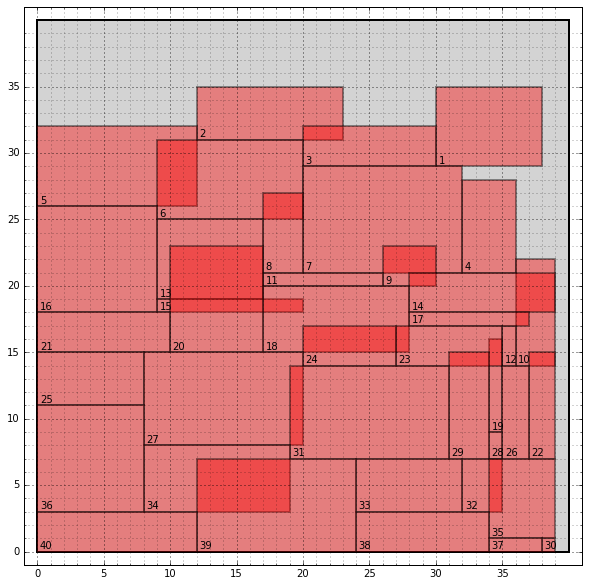

'Surface des pièces : 1420, surface du rectange: 1600. Surface possible: oui'

In [13]:
internet("zmZ0", "vBat")

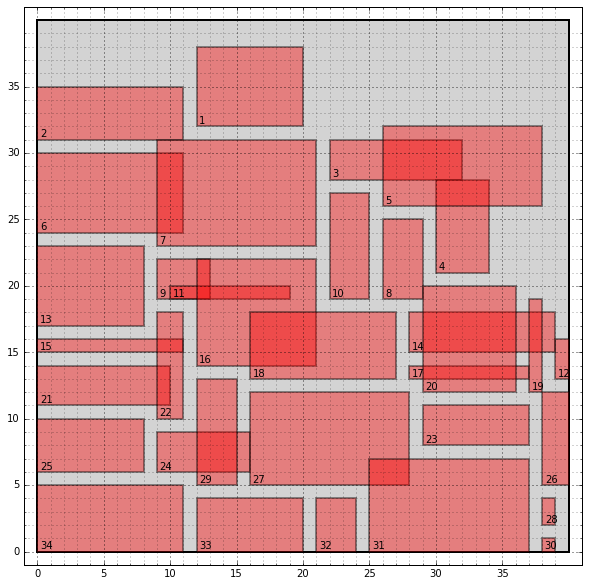

'Surface des pièces : 1172, surface du rectange: 1600. Surface possible: oui'

In [14]:
internet("Njwg", "rXpE")

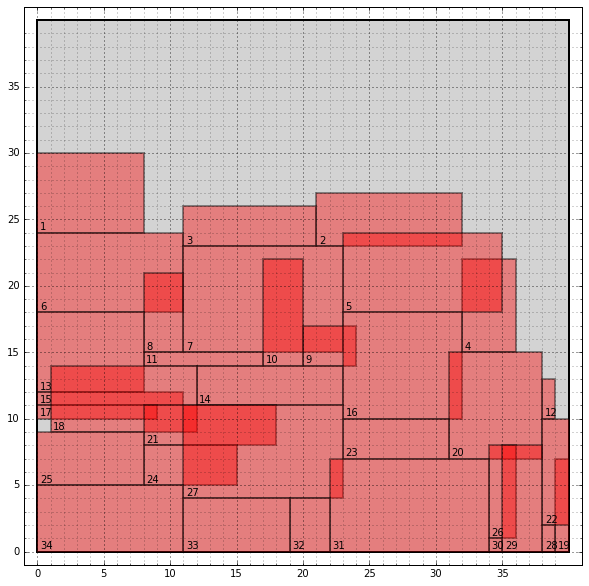

'Surface des pièces : 1172, surface du rectange: 1600. Surface possible: oui'

In [15]:
internet("Njwg", "rXYV")

In [16]:
#data = open("./src/BENG06.TXT").read().strip().replace("\r", "").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").split("\n")
#out = open("./src/sol2").read().strip().replace("\r", "").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").split("\n")
#check(data, out)

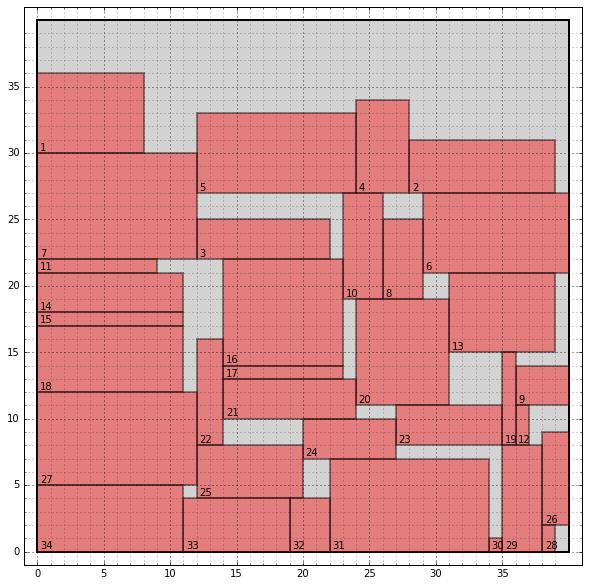

'Surface des pièces : 1172, surface du rectange: 1600. Surface possible: oui'

In [17]:
internet("Njwg", "fN4j")